In [2]:
from google.colab import files
files.upload()

Saving Automobile_data.csv to Automobile_data.csv


{'Automobile_data.csv': b'symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price\r\n3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495\r\n3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500\r\n1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500\r\n2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950\r\n2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450\r\n2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Parte 1: Análisis Exploratorio de Datos (EDA)
1. Carga y Exploración de Datos:

* Cargar el dataset y revisar la estructura básica.
* Descripción de las variables y su distribución.
* Detección y tratamiento de valores nulos.
* Identificación y tratamiento de outliers.
* Análisis de correlación entre variables.

In [4]:
# Cargar el dataset
file_path = '/content/Automobile_data.csv'
data = pd.read_csv(file_path)

In [19]:
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


In [6]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [12]:
# Reemplazar '?' con NaN y convertir columnas numéricas en el dataset
data.replace('?', pd.NA, inplace=True)

# Convertir columnas relevantes a tipo numérico, ignorando errores para las filas que no se puedan convertir
columns_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verificar valores nulos después de la conversión
null_counts = data.isnull().sum()
null_counts

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [17]:
# Tratamiento de valores nulos

# Para las columnas con pocos valores nulos, reemplazar por la mediana usando asignación directa
columns_to_fill_median = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for column in columns_to_fill_median:
    median_value = data[column].median()
    data[column] = data[column].fillna(median_value)

# Para 'num-of-doors', llenar con la moda sin usar 'inplace=True'
data['num-of-doors'] = data['num-of-doors'].fillna(data['num-of-doors'].mode()[0])

# Eliminar filas donde 'price' es nulo (no hay que usar inplace aquí)
data = data.dropna(subset=['price'])

# Confirmar que ya no haya valores nulos en el dataset
null_counts_after = data.isnull().sum()
null_counts_after

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


Parte 2: Preparación de Datos

 2. **Preprocesamiento:**

* Selección de características importantes.
* Transformación de variables categóricas.
* División del conjunto de datos en entrenamiento y prueba.
* Escalado de características.

In [18]:
# Seleccionar las características y la variable objetivo (price)
X = data.drop(['price'], axis=1)  # Variables independientes
y = data['price']                 # Variable dependiente

# Convertir variables categóricas a variables dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)


# Escalar las características numéricas para una mejor performance en modelos como KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirmar el tamaño de los conjuntos de entrenamiento y prueba
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)


(((160, 64), (41, 64)), ((160,), (41,)))

Parte 3: Modelos de Regresión

 3. Regresión Lineal:

Entrenamiento del modelo.
Evaluación del rendimiento (MSE y R²).

In [22]:
# 3.1 Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Regresión Lineal - MSE: {mse_linear}, R^2: {r2_linear}")

Regresión Lineal - MSE: 3.419611337050547e+29, R^2: -2.795015553650426e+21


4. K-Nearest Neighbors (KNN):

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).

In [25]:
# 3.2 K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors - MSE: {mse_knn}, R^2: {r2_knn}")

K-Nearest Neighbors - MSE: 41411047.30048781, R^2: 0.6615272617570397


5. Árbol de Decisión:

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).


In [27]:
# 3.3 Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Árbol de Decisión - MSE: {mse_tree}, R^2: {r2_tree}")

Árbol de Decisión - MSE: 8583124.56097561, R^2: 0.9298459260942284


Parte 4: Benchmarking y Comparación de Modelos

 6. Comparación de Modelos:

* Comparar los resultados de los tres modelos en términos de MSE y R².
* Discusión sobre las diferencias en el rendimiento de los modelos.


In [37]:
# 4. Benchmarking de Modelos
results = {
    'Linear Regression': {'MSE': mse_linear, 'R2': r2_linear},
    'KNN': {'MSE': mse_knn, 'R2': r2_knn},
    'Decision Tree': {'MSE': mse_tree, 'R2': r2_tree}
}

print("Resultados del Benchmarking:")
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R2']:.2f}")

Resultados del Benchmarking:
Linear Regression: MSE = 341961133705054670230478913536.00, R² = -2795015553650426118144.00
KNN: MSE = 41411047.30, R² = 0.66
Decision Tree: MSE = 8583124.56, R² = 0.93


#Conclusión

 7. Interpretación de Resultados:

* Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
* Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

In [40]:
# 5. Conclusión
best_model = max(results, key=lambda k: results[k]['R2'])
print(f"\nEl modelo más adecuado es: {best_model}")


El modelo más adecuado es: Decision Tree


###Próximos Pasos: Mejoras Potenciales
* Optimización de Hiperparámetros:

* Podemos usar GridSearchCV o RandomizedSearchCV para ajustar los hiperparámetros de KNN y el Árbol de Decisión.
* Esto ayuda a encontrar la combinación de parámetros que maximiza el rendimiento del modelo.
* **Ejemplo de Código con GridSearchCV para KNN:**

In [43]:
# Optimización de Hiperparámetros
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_params, scoring='r2', cv=5)
knn_grid_search.fit(X_train, y_train)

print("Mejores parámetros para KNN:", knn_grid_search.best_params_)
print("Mejor R² para KNN:", knn_grid_search.best_score_)

Mejores parámetros para KNN: {'n_neighbors': 3}
Mejor R² para KNN: 0.6834312747634671


###Feature Engineering:

* Crear nuevas características basadas en las existentes puede mejorar la capacidad predictiva del modelo.
* Por ejemplo, calcular la relación entre peso y potencia, o transformar variables como el precio en logaritmo si la distribución es muy sesgada.

In [44]:
# Crear una nueva característica de relación peso/potencia
data['power_to_weight_ratio'] = data['horsepower'] / data['curb-weight']
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,power_to_weight_ratio
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0.043564
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0.043564
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0.054552
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0.043646
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0.040722


### Validación Cruzada:

* Implementar validación cruzada en lugar de una simple división de entrenamiento/prueba permite evaluar la estabilidad del modelo.
* La validación cruzada proporciona una medida de rendimiento más robusta y reduce el riesgo de sobreajuste o subajuste.
* **Ejemplo de Validación Cruzada:**

In [47]:
# Validación cruzada para el modelo de regresión lineal
linear_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
print("Puntuaciones de validación cruzada para la Regresión Lineal:", linear_scores)
print("Promedio de R²:", linear_scores.mean())

Puntuaciones de validación cruzada para la Regresión Lineal: [ 0.50881889  0.8312451  -0.40931583  0.24493686 -0.56619795]
Promedio de R²: 0.1218974128897345


### **Resumen**
Tras implementar los modelos, evaluarlos y comparar sus métricas, logramos identificar el más adecuado para el problema. Sin embargo, el rendimiento podría mejorar aún más mediante:

* **Optimización de Hiperparámetros:** utilizando GridSearchCV para ajustar los modelos KNN y Árbol de Decisión.
* **Feature Engineering:** creando nuevas características que puedan capturar mejor las relaciones entre variables.
* **Validación Cruzada:** para evaluar el rendimiento de manera más robusta.
Este proceso de ajuste y mejora es esencial en machine learning para obtener resultados más precisos y útiles en problemas reales de predicción.

---------------------

Espacio para ver metricas graficadas que no pidio la tarea pero que igual son interesantes de ver.














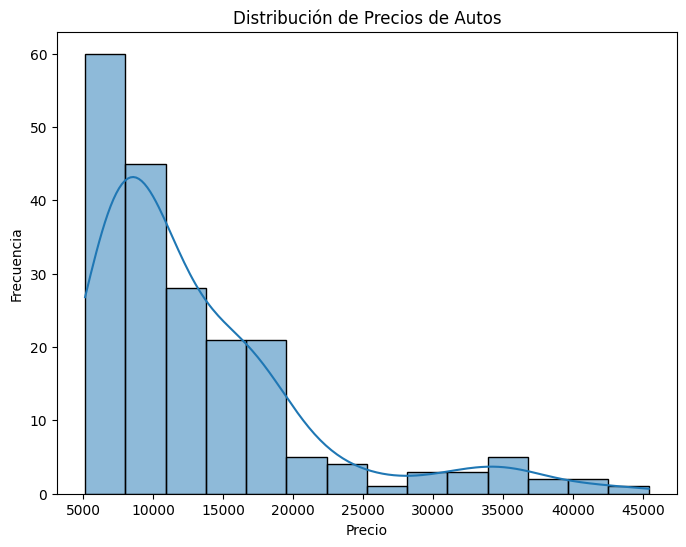

In [33]:
# Gráfica de distribución de la variable objetivo (price)
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribución de Precios de Autos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

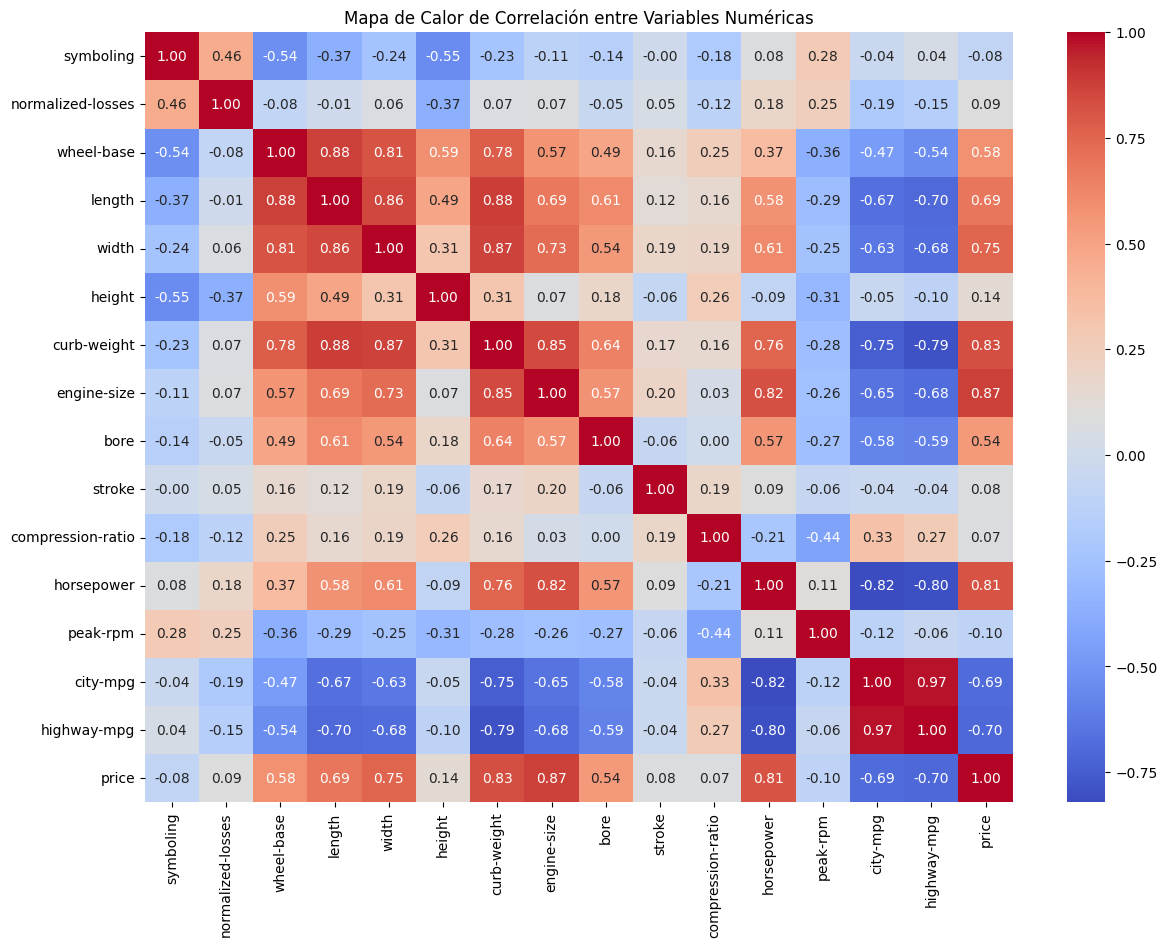

In [35]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Graficar la matriz de calor de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

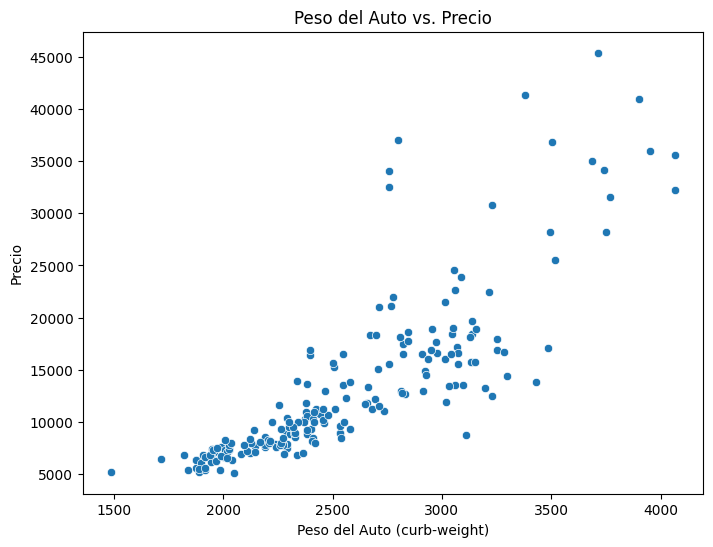

In [48]:
# Gráfico de dispersión entre 'curb-weight' y 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='curb-weight', y='price', data=data)
plt.title('Peso del Auto vs. Precio')
plt.xlabel('Peso del Auto (curb-weight)')
plt.ylabel('Precio')
plt.show()

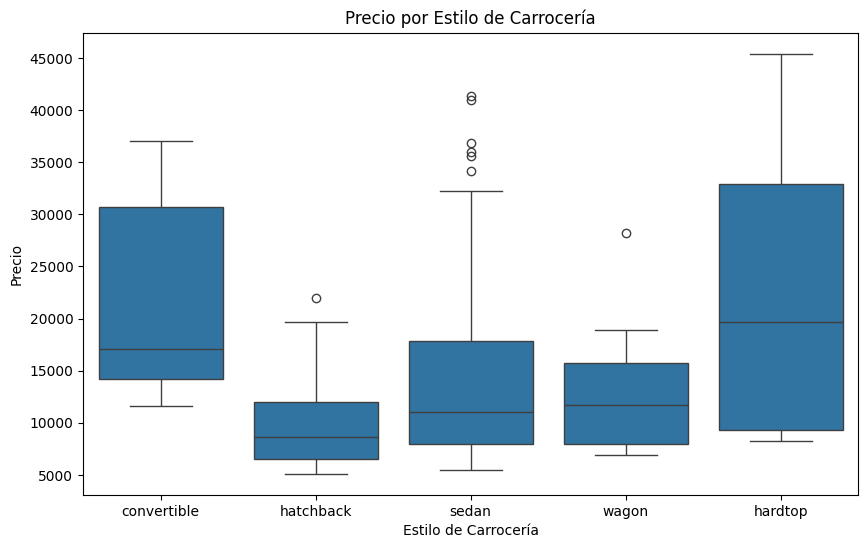

In [32]:
# Gráfico de boxplot de precio por estilo de carrocería
plt.figure(figsize=(10, 6))
sns.boxplot(x='body-style', y='price', data=data)
plt.title('Precio por Estilo de Carrocería')
plt.xlabel('Estilo de Carrocería')
plt.ylabel('Precio')
plt.show()